In [2]:
pip install tensorflow


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for jax: filename=jax-0.4.12-py3-none-any.whl size=1498562 sha256=4151e69c16c78c79bfd8a71dd666f3e4529af1be05f5a2783472d7b788d96969
  Stored in directory: c:\users\yadav\appdata\local\pip\cache\wheels\cd\5a\a8\88d7a5c8d35f5a5e9cddec186ce76d5e303e0462d8a6c827bb
Successfully built jax
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 2.0.0
    Uninstalling importlib-metadata-2.0.0:
      Successfully uninstalled importlib-metadata-2.0.0
  Attempting uninstall: scipy
    Fou

In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator


Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Epoch 1/10
142/142 [==============================] - 376s 3s/step - loss: -250650864.0000 - accuracy: 0.2351 - val_loss: -2018791040.0000 - val_accuracy: 0.2366
Epoch 2/10
142/142 [==============================] - 143s 1s/step - loss: -41077301248.0000 - accuracy: 0.2344 - val_loss: -156029353984.0000 - val_accuracy: 0.2348
Epoch 3/10
142/142 [==============================] - 140s 988ms/step - loss: -647800881152.0000 - accuracy: 0.2340 - val_loss: -1632854081536.0000 - val_accuracy: 0.2348
Epoch 4/10
142/142 [==============================] - 141s 994ms/step - loss: -3849678749696.0000 - accuracy: 0.2346 - val_loss: -7618023653376.0000 - val_accuracy: 0.2357
Epoch 5/10
142/142 [==============================] - 141s 991ms/step - loss: -14401650294784.0000 - accuracy: 0.2349 - val_loss: -25517566722048.0000 - val_accuracy: 0.2348
Epoch 6/10
142/142 [==============================] - 141s 995ms/step -

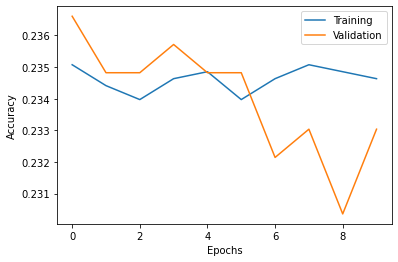

Found 1311 images belonging to 4 classes.
41/41 [==============================] - 65s 2s/step
Accuracy: 0.2334096109839817
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       300
           1       0.23      1.00      0.38       306
           2       0.00      0.00      0.00       405
           3       0.00      0.00      0.00       300

    accuracy                           0.23      1311
   macro avg       0.06      0.25      0.09      1311
weighted avg       0.05      0.23      0.09      1311



C:\Users\yadav\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [3]:
# Set the image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Load the dataset and perform train-test split
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    "C:\\Users\yadav\Downloads\Brain_Tumor_Dataset\Training",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    "C:\\Users\yadav\Downloads\Brain_Tumor_Dataset\Training",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10
)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.show()

# Make predictions on the test set
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
    "C:\\Users\yadav\Downloads\Brain_Tumor_Dataset\Testing",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

y_pred = model.predict(test_generator)
y_pred = np.round(y_pred.flatten())

# Evaluate the model
y_true = test_generator.classes
accuracy = accuracy_score(y_true, y_pred)
report = classification_report(y_true, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)